# US-Ignite Fed_Notebook

# Data from 2009-2016

In [1]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [2]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [3]:
import seaborn as sns

In [4]:
df_final=pd.read_csv("~/Downloads/Final_merged_city.csv")

In [5]:
df_final.head(100)

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,ratio_65,ratio_22_50,diffEmpratio,diffestabratio,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,4384,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1194.0,2433.0,1651.0,130.0,107.0,...,0.345664,0.058775,-1.350294,-0.017613,0.000000,0.000000,0.000000,0.917085,0.000000,0.044389
1,4387,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1229.0,2496.0,1717.0,124.0,114.0,...,0.332131,0.079327,5.401174,0.516634,0.000000,0.000000,0.000000,0.926770,0.000000,0.038242
2,4390,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1297.0,2529.0,1790.0,124.0,107.0,...,0.345987,0.086200,-5.988258,-0.023483,0.000000,0.000000,0.000000,0.925212,0.000000,0.032382
3,4393,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1226.0,2698.0,1900.0,141.0,148.0,...,0.320979,0.143810,5.518591,0.023483,0.000000,0.000000,0.000000,0.933931,0.000000,0.029364
4,4396,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1239.0,2699.0,1865.0,143.0,135.0,...,0.309003,0.115969,1.409002,-0.011742,0.000000,0.000000,0.000000,0.934625,0.000000,0.005650
5,4399,6073015502,POINT (-116.830446134218 32.81131662191954),2015,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1365.0,2909.0,2005.0,126.0,152.0,...,0.314197,0.114816,-1.878669,0.011742,0.000000,0.000000,0.000000,0.931868,0.000000,0.005128
6,4402,6073015502,POINT (-116.8299969494062 32.81020076184434),2016,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1331.0,2849.0,2017.0,108.0,151.0,...,0.316602,0.151281,14.559687,0.035225,0.000000,0.000000,0.000000,0.894065,0.000000,0.005259
7,4405,6073015502,POINT (-116.8300017429104 32.81048542676395),2017,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1322.0,2902.0,2072.0,135.0,162.0,...,0.310820,0.155065,-632.745245,-33.312888,0.000000,0.000000,0.000000,0.891831,0.000000,0.003026
8,7664,6073021202,POINT (-116.641978140868 32.8284525792826),2010,MULTIPOLYGON (((-116.7511618358752 32.79765279...,1172.0,2828.0,1930.0,86.0,43.0,...,0.368105,0.050919,-64.814090,-0.845401,0.000000,0.000000,0.000000,0.931741,0.000000,0.010239
9,7667,6073021202,POINT (-116.641978140868 32.8284525792826),2011,MULTIPOLYGON (((-116.7511618358752 32.79765279...,1265.0,3164.0,1991.0,87.0,94.0,...,0.343552,0.086283,259.256360,24.798434,0.000000,0.000000,0.000000,0.905138,0.000000,0.008696


In [6]:
df_final.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'gini', 'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'diffEmpratio', 'diffestabratio', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio'],
      dtype='object')

In [7]:
#data=df_final[['zipcode', 'geoid', 'NAICS2012', 'year', 'edut',
#       'collegemale', 'collegefemale','pop',
 #      'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
 #      'estabratio']]

In [8]:
data=df_final[['zipcode', 'geo_id', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
     'households', 'income', 'gini',  'Empratio',
    'estabratio','ratio_65','ratio_22_50','diffEmpratio','diffestabratio','bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio']]

In [9]:
data['total_college']=data['collegemale']+data['collegefemale']
data['college_ratio']=data['total_college']/data['edut']
data['college_ratio_pop']=data['total_college']/data['pop']

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [10]:
data['Empratio'][data['Empratio']!=0.0].sort_values()

7663        0.043165
7647        0.043165
7658        0.258993
7642        0.258993
7659        0.273381
7644        0.273381
7645        0.273381
7643        0.273381
7661        0.273381
7660        0.273381
7646        0.287770
7662        0.287770
7640        0.302158
7656        0.302158
7657        0.345324
7641        0.345324
599         2.625000
1383        3.753501
3583        3.925234
7707        4.561533
7706        4.649963
7711        4.675755
1381        4.677871
1378        4.789916
1379        4.789916
7708        4.882093
1382        4.901961
7709        4.974208
3751        5.054785
7710        5.081061
            ...     
5542    32933.369596
5838    33459.220005
4658    33998.217262
5536    34346.217573
4659    34882.022885
4663    35217.259500
4660    35487.190281
5537    35788.256625
6919    36180.850288
4656    37394.120639
4661    37603.099308
4657    37725.003532
4662    38386.769318
5833    38780.507904
5832    39628.452967
6815    40788.255067
6813    43328

In [11]:
data['Empratio'].describe() 

count     7896.000000
mean      1346.698271
std       3608.322707
min          0.000000
25%         58.577551
50%        361.894331
75%       1224.784588
max      50304.527929
Name: Empratio, dtype: float64

In [12]:
data['Empratio'].sort_values()

2440        0.000000
5337        0.000000
5336        0.000000
2458        0.000000
2459        0.000000
2460        0.000000
2461        0.000000
2462        0.000000
2463        0.000000
5119        0.000000
5118        0.000000
5117        0.000000
5116        0.000000
5115        0.000000
5114        0.000000
5113        0.000000
5112        0.000000
4903        0.000000
4902        0.000000
4901        0.000000
4900        0.000000
4899        0.000000
4898        0.000000
4897        0.000000
727         0.000000
4896        0.000000
726         0.000000
724         0.000000
2445        0.000000
2446        0.000000
            ...     
5542    32933.369596
5838    33459.220005
4658    33998.217262
5536    34346.217573
4659    34882.022885
4663    35217.259500
4660    35487.190281
5537    35788.256625
6919    36180.850288
4656    37394.120639
4661    37603.099308
4657    37725.003532
4662    38386.769318
5833    38780.507904
5832    39628.452967
6815    40788.255067
6813    43328

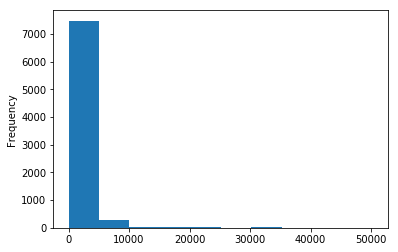

In [13]:
data['Empratio'].plot(kind ="hist")

In [14]:
data['estabratio'].describe() 

count    7896.000000
mean       68.831548
std       147.831421
min         0.000000
25%         3.529081
50%        20.630991
75%        69.889266
max      1682.911376
Name: estabratio, dtype: float64

In [15]:
data['logesration']=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


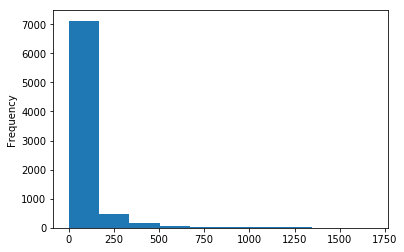

In [16]:
data['estabratio'].plot(kind ="hist")

In [17]:
loges=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [18]:
data['gini'].describe() 

count    7896.000000
mean        0.405519
std         0.072611
min         0.000000
25%         0.368600
50%         0.405000
75%         0.445400
max         0.722600
Name: gini, dtype: float64

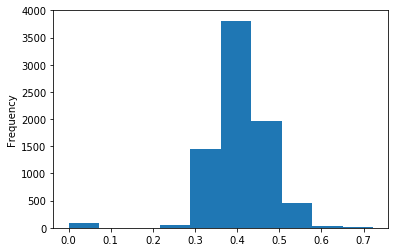

In [19]:
data['gini'].plot(kind ="hist") 

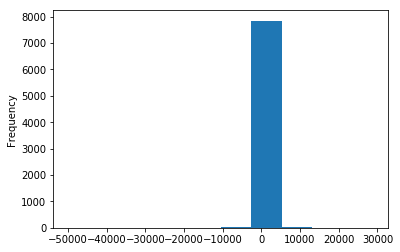

In [20]:
data['diffEmpratio'].plot(kind ="hist")

In [21]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geo_id'),
 Text(2.5, 0, 'year'),
 Text(3.5, 0, 'edut'),
 Text(4.5, 0, 'collegemale'),
 Text(5.5, 0, 'collegefemale'),
 Text(6.5, 0, 'pop'),
 Text(7.5, 0, 'households'),
 Text(8.5, 0, 'income'),
 Text(9.5, 0, 'gini'),
 Text(10.5, 0, 'Empratio'),
 Text(11.5, 0, 'estabratio'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'ratio_22_50'),
 Text(14.5, 0, 'diffEmpratio'),
 Text(15.5, 0, 'diffestabratio'),
 Text(16.5, 0, 'bus_ratio'),
 Text(17.5, 0, 'bus_ratio_total'),
 Text(18.5, 0, 'public_ratio'),
 Text(19.5, 0, 'car_ratio'),
 Text(20.5, 0, 'bicy_ratio'),
 Text(21.5, 0, 'walked_ratio'),
 Text(22.5, 0, 'total_college'),
 Text(23.5, 0, 'college_ratio'),
 Text(24.5, 0, 'college_ratio_pop'),
 Text(25.5, 0, 'logesration')]

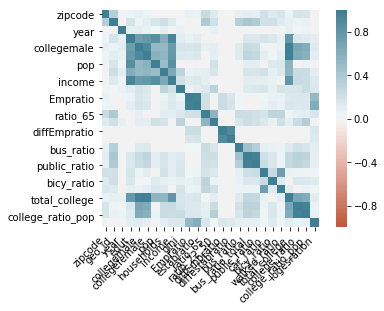

In [22]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# modeling 

In [23]:
df=data

In [24]:
df.columns

Index(['zipcode', 'geo_id', 'year', 'edut', 'collegemale', 'collegefemale',
       'pop', 'households', 'income', 'gini', 'Empratio', 'estabratio',
       'ratio_65', 'ratio_22_50', 'diffEmpratio', 'diffestabratio',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'total_college', 'college_ratio',
       'college_ratio_pop', 'logesration'],
      dtype='object')

In [25]:
df.head()

,zipcode,geo_id,year,edut,collegemale,collegefemale,pop,households,income,gini,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,total_college,college_ratio,college_ratio_pop,logesration
0,91901,6073015502,2010,1651.0,130.0,107.0,2433.0,83.0,864.0,0.4400,...,0.0,0.0,0.0,0.917085,0.0,0.044389,237.0,0.143549,0.097411,0.851204
1,91901,6073015502,2011,1717.0,124.0,114.0,2496.0,95.0,896.0,0.4080,...,0.0,0.0,0.0,0.926770,0.0,0.038242,238.0,0.138614,0.095353,0.858695
2,91901,6073015502,2012,1790.0,124.0,107.0,2529.0,113.0,904.0,0.3790,...,0.0,0.0,0.0,0.925212,0.0,0.032382,231.0,0.129050,0.091340,0.611636
3,91901,6073015502,2013,1900.0,141.0,148.0,2698.0,136.0,903.0,0.3782,...,0.0,0.0,0.0,0.933931,0.0,0.029364,289.0,0.152105,0.107116,0.624294
4,91901,6073015502,2014,1865.0,143.0,135.0,2699.0,154.0,883.0,0.3837,...,0.0,0.0,0.0,0.934625,0.0,0.005650,278.0,0.149062,0.103001,0.611636


In [26]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [27]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [28]:
df['year']=df['year'].dt.year

In [29]:
#add column year to index
df=df.set_index([ 'zipcode','year'])
#swap indexes




In [30]:
import statsmodels.formula.api as smf

In [31]:
df.columns

Index(['geo_id', 'edut', 'collegemale', 'collegefemale', 'pop', 'households',
       'income', 'gini', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'diffEmpratio', 'diffestabratio', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio',
       'total_college', 'college_ratio', 'college_ratio_pop', 'logesration'],
      dtype='object')

# modeling
use all the varaibles to predict establishment ratios 
1. pop: the total population of the corresponding census tract(not prediction)
2. households: households of the corresponding census tract
3. Income: income of the corresponding census tract
4. edit: total education population of the corresponding census tract
5. Total_college: total college population of the corresponding census tract
6. College_ratio: total college ratio
7. Ratio_65: the ratio of the population who are older than 65
8. Ration_22_50: the ratio of the population who are from 22 to 50
9. diffEmpratio: the difference of employee size ratio from last year at same census tract
10. diffestabratio: the difference of establishment ratio from last year at the same census tract
11. college_ratio_pop: the ratio of college attendance by the total population
12. bus_ratio: the ratio of bus usage by total public transportation
13. bus_ratio_total: the ratio of bus usage by total transportation(including private and public transportation)
14. public_ratio: the ratio of public transportation by total transportation
15. car_ratio: the ratio of car usage by total transportation
16. bicy_ratio: the ratio of bicycle usage by total transportation
17. walked_ratio: ration of people who walked to work by total transportation usage
18. gini: Gini index of the corresponding census tract



In [32]:
FE_ols1 = smf.ols(formula= 'estabratio ~ 1 +pop+gini+households+income+edut+total_college+college_ratio+ratio_65+ratio_22_50+diffEmpratio+diffestabratio+college_ratio_pop+bus_ratio+bus_ratio_total+public_ratio+car_ratio+bicy_ratio+walked_ratio', data = df).fit()
print(FE_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     74.82
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          3.60e-253
Time:                        09:26:49   Log-Likelihood:                -49933.
No. Observations:                7880   AIC:                         9.990e+04
Df Residuals:                    7861   BIC:                         1.000e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -163.8130     29.51

In [33]:
##due to the p value of college_ration is really large, the we drop college_ratio and young people ratio
#n
bus_ratio+bus_ratio_total+public_ratio+car_ratio+bicy_ratio+walked_ratio

NameError: name 'bus_ratio' is not defined

In [74]:
FE_ols2 = smf.ols(formula= 'estabratio ~ 1 +pop+gini+income+edut+total_college+ratio_65+diffEmpratio+diffestabratio+bus_ratio+bus_ratio_total+public_ratio+walked_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          2.05e-254
Time:                        22:11:25   Log-Likelihood:                -50040.
No. Observations:                7896   AIC:                         1.001e+05
Df Residuals:                    7883   BIC:                         1.002e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -115.4015     12.974     

In [ ]:
#+households

In [34]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [35]:
df.columns

Index(['geo_id', 'edut', 'collegemale', 'collegefemale', 'pop', 'households',
       'income', 'gini', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'diffEmpratio', 'diffestabratio', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio',
       'total_college', 'college_ratio', 'college_ratio_pop', 'logesration'],
      dtype='object')

In [36]:

#year = pd.Categorical(year)

In [75]:
df.dropna(inplace=True)

In [76]:

exog_vars = ['pop','gini','income','edut','ratio_65','diffEmpratio','diffestabratio',
            'bus_ratio','public_ratio','walked_ratio']
exog = sm.add_constant(df[exog_vars])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
df.isnull().values.any()
df.isnull().sum()
df=df.dropna()

In [78]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(df.estabratio , exog)


In [79]:
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             estabratio   R-squared:                        0.1236
Estimator:              RandomEffects   R-squared (Between):              0.0863
No. Observations:                7880   R-squared (Within):               0.1190
Date:                Thu, Mar 26 2020   R-squared (Overall):              0.1322
Time:                        22:12:35   Log-likelihood                -4.951e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      110.93
Entities:                         102   P-value                           0.0000
Avg Obs:                       77.255   Distribution:                 F(10,7869)
Min Obs:                       8.0000                                           
Max Obs:                       192.00   F-statistic (robust):             108.21
                            

In [80]:

exog_vars1 =['pop','gini','income','ratio_65','diffEmpratio','diffestabratio',
            'bus_ratio','public_ratio','walked_ratio']
exog1 = sm.add_constant(df[exog_vars1])

In [81]:
FE_olsfinal =  smf.ols(formula= 'estabratio ~ 1 +pop+gini+income+edut+total_college+ratio_65+diffEmpratio+diffestabratio+bus_ratio+bus_ratio_total+public_ratio+walked_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          2.05e-254
Time:                        22:12:38   Log-Likelihood:                -50040.
No. Observations:                7896   AIC:                         1.001e+05
Df Residuals:                    7883   BIC:                         1.002e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -115.4015     12.974     

In [82]:
mod2 = PanelOLS(df.estabratio, exog1, entity_effects=True, time_effects=True)
fe_te_res = mod2.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             estabratio   R-squared:                        0.1192
Estimator:                   PanelOLS   R-squared (Between):              0.0257
No. Observations:                7880   R-squared (Within):               0.1194
Date:                Thu, Mar 26 2020   R-squared (Overall):              0.1287
Time:                        22:12:41   Log-likelihood                -4.935e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      116.72
Entities:                         102   P-value                           0.0000
Avg Obs:                       77.255   Distribution:                  F(9,7762)
Min Obs:                       8.0000                                           
Max Obs:                       192.00   F-statistic (robust):             116.72
                            

In [83]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':fe_te_res}))

                    Model Comparison                    
                                       RE         Pooled
--------------------------------------------------------
Dep. Variable                  estabratio     estabratio
Estimator                   RandomEffects       PanelOLS
No. Observations                     7880           7880
Cov. Est.                      Unadjusted     Unadjusted
R-squared                          0.1236         0.1192
R-Squared (Within)                 0.1190         0.1194
R-Squared (Between)                0.0863         0.0257
R-Squared (Overall)                0.1322         0.1287
F-statistic                        110.93         116.72
P-value (F-stat)                   0.0000         0.0000
=====================     ===============   ============
const                             -134.73        -149.68
                                (-9.3682)      (-10.700)
pop                               -0.0109        -0.0135
                               

In [44]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [45]:
df_final=df_final.dropna()

In [46]:
df_final['Empratio'][df_final['Empratio']!=0.0].sort_values()
df_final['total_college']=df_final['collegemale']+df_final['collegefemale']
df_final['college_ratio']=df_final['total_college']/df_final['edut']

In [47]:
from shapely import wkt

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)
df_final['centroid'] = df_final['centroid'].apply(wkt.loads)

In [48]:
dfshp = gp.GeoDataFrame(df_final, geometry='geometry')

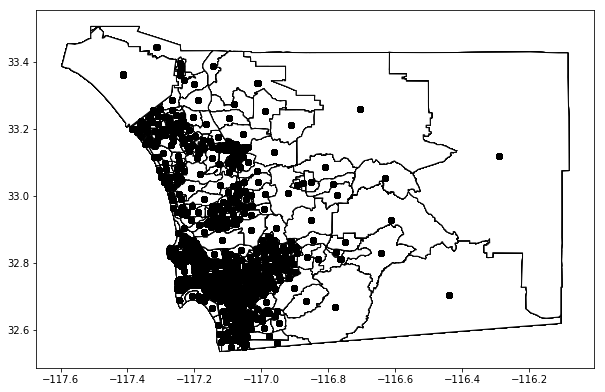

In [49]:

fig, ax = plt.subplots(figsize = (10, 10))
dfshp.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
dfshp.centroid.plot(ax = ax, c = 'black')
plt.savefig('sd_shp')
plt.show()

In [50]:
dfshp.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,diffEmpratio,diffestabratio,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,total_college,college_ratio
0,4384,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1194.0,2433.0,1651.0,130.0,107.0,...,-1.350294,-0.017613,0.0,0.0,0.0,0.917085,0.0,0.044389,237.0,0.143549
1,4387,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1229.0,2496.0,1717.0,124.0,114.0,...,5.401174,0.516634,0.0,0.0,0.0,0.926770,0.0,0.038242,238.0,0.138614
2,4390,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1297.0,2529.0,1790.0,124.0,107.0,...,-5.988258,-0.023483,0.0,0.0,0.0,0.925212,0.0,0.032382,231.0,0.129050
3,4393,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1226.0,2698.0,1900.0,141.0,148.0,...,5.518591,0.023483,0.0,0.0,0.0,0.933931,0.0,0.029364,289.0,0.152105
4,4396,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1239.0,2699.0,1865.0,143.0,135.0,...,1.409002,-0.011742,0.0,0.0,0.0,0.934625,0.0,0.005650,278.0,0.149062


In [51]:
g_y=dfshp['estabratio'].values.reshape((-1, 1))

In [52]:
g_X =dfshp[['pop','gini','income','edut','ratio_65','diffEmpratio','diffestabratio',
            'bus_ratio','public_ratio','walked_ratio']].values

In [53]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp['centroid']))]

In [54]:
g_coords = g_coords = list(zip(x, y))

In [55]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [56]:
gwr_bw = gwr_selector.search()

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.209253e-18
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.496829e-18
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.623598e-18
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.515110e-18
  xtx

In [57]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [58]:
gwr_results = gwr_model.fit()

In [59]:
print(gwr_results.resid_ss)

47247019.49887987


In [60]:
bws = (x for x in range(25, 175, 25))

In [61]:
print(gwr_results.aic)
print(gwr_results.aicc)
print(gwr_results.R2)

93541.74555742064
93997.72358942968
0.726165111797853


In [62]:
len(dfshp)

7896

In [63]:
s=abs(gwr_results.localR2)

In [64]:
gwr_results.localR2

array([[0.79530622],
       [0.79530622],
       [0.79530622],
       ...,
       [0.07471489],
       [0.07471595],
       [0.07471536]])

In [65]:
dfshp['R2'] =gwr_results.localR2

In [66]:
dfshp['R2']=abs(dfshp['R2'])

In [67]:
dfshp2=dfshp[dfshp['R2']<=1]

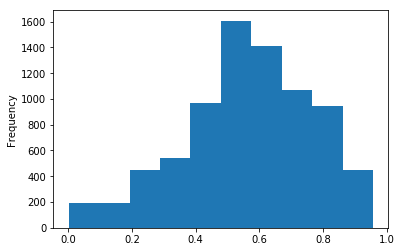

In [68]:
dfshp2['R2'].plot(kind ="hist")

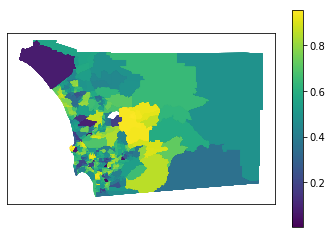

In [69]:
#Local model fit
#dfshp2['R2'] =abs(gwr_results.localR2)
dfshp2.plot('R2', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('local_R2')
plt.show()